In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import pandas as pd
import re
import statistics
import ast
import numpy as np
pd.set_option('display.max_colwidth', None)
# Import all the libraries we will need to perform our analyses

In [3]:
# Define the path, "r" to let Python read the string exactly as written
file_path=r"/Users/mattiadetommaso/Downloads/ted.csv"
dataset= pd.read_csv(file_path)
# Convert "published_date" to a datetime type to extract the presentation year, using "unit='s'" because the data is in seconds
dataset['published_date'] = pd.to_datetime(dataset['published_date'], unit='s')


In [4]:
dataset.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]","[{'id': 865, 'hero': 'https://pe.tedcdn.com/images/ted/172559_800x600.jpg', 'speaker': 'Ken Robinson', 'title': 'Bring on the learning revolution!', 'duration': 1008, 'slug': 'sir_ken_robinson_bring_on_the_revolution', 'viewed_count': 7266103}, {'id': 1738, 'hero': 'https://pe.tedcdn.com/images/ted/de98b161ad1434910ff4b56c89de71af04b8b873_1600x1200.jpg', 'speaker': 'Ken Robinson', 'title': ""How to escape education's death valley"", 'duration': 1151, 'slug': 'ken_robinson_how_to_escape_education_s_death_valley', 'viewed_count': 6657572}, {'id': 2276, 'hero': 'https://pe.tedcdn.com/images/ted/3821f3728e0b755c7b9aea2e69cc093eca41abe1_2880x1620.jpg', 'speaker': 'Linda Cliatt-Wayman', 'title': 'How to fix a broken school? Lead fearlessly, love hard', 'duration': 1027, 'slug': 'linda_cliatt_wayman_how_to_fix_a_broken_school_lead_fearlessly_love_hard', 'viewed_count': 1617101}, {'id': 892, 'hero': 'https://pe.tedcdn.com/images/ted/e79958940573cc610ccb583619a54866c41ef303_2880x1620.jpg', 'speaker': 'Charles Leadbeater', 'title': 'Education innovation in the slums', 'duration': 1138, 'slug': 'charles_leadbeater_on_education', 'viewed_count': 772296}, {'id': 1232, 'hero': 'https://pe.tedcdn.com/images/ted/0e3e4e92d5ee8ae0e43962d447d3f790b31099b8_800x600.jpg', 'speaker': 'Geoff Mulgan', 'title': 'A short intro to the Studio School', 'duration': 376, 'slug': 'geoff_mulgan_a_short_intro_to_the_studio_school', 'viewed_count': 667971}, {'id': 2616, 'hero': 'https://pe.tedcdn.com/images/ted/71cde5a6fa6c717488fb55eff9eef939a9241761_2880x1620.jpg', 'speaker': 'Kandice Sumner', 'title': ""How America's public schools keep kids in poverty"", 'duration': 830, 'slug': 'kandice_sumner_how_america_s_public_schools_keep_kids_in_poverty', 'viewed_count': 1181333}]",Author/educator,"['children', 'creativity', 'culture', 'dance', 'education', 'parenting', 'teaching']",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_schools_kill_creativity,47227110
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'id': 3, 'name': 'Courageous', 'count': 139}, {'id': 2, 'name': 'Confusing', 'count': 62}, {'id': 1, 'name': 'Beautiful', 'count': 58}, {'id': 21, 'name': 'Unconvincing', 'count': 258}, {'id': 11, 'name': 'Longwinded', 'count': 113}, {'id': 8, 'name': 'Informative', 'count': 443}, {'id': 10, 'name': 'Inspiring', 'count': 413}, {'id': 22, 'name': 'Fascinating', 'count': 132}, {'id': 9, 'name': 'Ingenious', 'count': 56}, {'id': 24, 'name': 'Persuasive', 'count': 268}, {'id': 23, 'name': 'Jaw-dropping', 'count': 116}, {'id': 26, 'name': 'O

In [5]:
dataset.shape

(2550, 17)

In [6]:

# Define a variable "var" containing the data types, then convert it into a list
var=dataset.dtypes
var=var.tolist()
# Define a variable to store the count of null values and convert it into a list
var_n=dataset.isnull().sum()
var_n=var_n.tolist()
# Define a variable to store the column names and convert it into a list
colonne=dataset.columns.tolist()
# Merge the lists to create a final list where each variable includes its name, data type, and null value count
lista_finale=zip(colonne,var,var_n)
lista_finale_v2=list(lista_finale)
for c,d,n in lista_finale_v2:
    print("Variable:",c,", type:",d,", nulls:",n)

Variable: comments , type: int64 , nulls: 0
Variable: description , type: object , nulls: 0
Variable: duration , type: int64 , nulls: 0
Variable: event , type: object , nulls: 0
Variable: film_date , type: int64 , nulls: 0
Variable: languages , type: int64 , nulls: 0
Variable: main_speaker , type: object , nulls: 0
Variable: name , type: object , nulls: 0
Variable: num_speaker , type: int64 , nulls: 0
Variable: published_date , type: datetime64[ns] , nulls: 0
Variable: ratings , type: object , nulls: 0
Variable: related_talks , type: object , nulls: 0
Variable: speaker_occupation , type: object , nulls: 6
Variable: tags , type: object , nulls: 0
Variable: title , type: object , nulls: 0
Variable: url , type: object , nulls: 0
Variable: views , type: int64 , nulls: 0


In [7]:
duplicated = dataset['title'].duplicated().sum()

print(f"There are {duplicated} duplicates in the 'title' column.")

There are 0 duplicates in the 'title' column.


In [9]:
# Each presentation is uniquely identified by its title. To streamline the analysis, we are assigning an incremental numerical ID to each title. This mapping is stored in a dictionary for easy lookup, and the new identifier is integrated into the original dataframe as a new variable.

dataset['ID'] = dataset.index.astype(str)
dictionary = dict(zip(dataset['title'], dataset['ID']))
dictionary

{'Do schools kill creativity?': '0',
 'Averting the climate crisis': '1',
 'Simplicity sells': '2',
 'Greening the ghetto': '3',
 "The best stats you've ever seen": '4',
 'Why we do what we do': '5',
 'Letting go of God': '6',
 "Behind the design of Seattle's library": '7',
 "Let's teach religion -- all religion -- in schools": '8',
 'A life of purpose': '9',
 'My wish: A call for open-source architecture': '10',
 'My wish: A global day of film': '11',
 'My wish: Help me stop pandemics': '12',
 'The radical promise of the multi-touch interface': '13',
 'One Laptop per Child': '14',
 "An 11-year-old's magical violin": '15',
 'Improvising on piano, aged 14': '16',
 'Simple designs to save a life': '17',
 'Organic design, inspired by nature': '18',
 'The birth of Wikipedia': '19',
 'The birth of the open-source learning revolution': '20',
 'Nerdcore comedy': '21',
 'Meet the founder of the blog revolution': '22',
 'Why we love, why we cheat': '23',
 'Happiness in body and soul': '24',
 'C

In [10]:
# Only one variable contains missing values. We will first print all its unique potential values to inspect them. Then, we’ll create a separate dataframe to isolate the rows with missing data for this variable, before finally removing those rows from the original dataset.

print("The possible values for the variable with missing data are:",dataset['speaker_occupation'].unique())
# We are creating a new dataset to isolate only the rows where the "speaker_occupation" variable contains null values.
dataset_speaker_occupation_nul= dataset[dataset['speaker_occupation'].isnull()]
# We are removing all rows from the original dataset where the "speaker_occupation" variable contains null values.
dataset=dataset[~dataset['speaker_occupation'].isnull()]


The possible values for the variable with missing data are: ['Author/educator' 'Climate advocate' 'Technology columnist' ...
 'Historian, philosopher' 'Astrobiologist' ' Robotics engineer']


In [11]:
# We are generating descriptive statistics for the numerical variables, specifically calculating the mean, median, mode, and standard deviation. We will also produce a correlation matrix limited to numerical variables to identify which ones are most strongly related. Finally, we will plot the correlation matrix, focusing on making it as readable and clear as possible.
statistics = {}
# We are defining a loop to calculate the various indices for each variable and then append them to our list.
for i in dataset.columns:
    if is_numeric_dtype(dataset[i]):
        statistics[i] = {
            "mean": dataset[i].mean(),
            "median": dataset[i].median(),
            "mode": dataset[i].mode().iloc[0] , # The function dataset[i].mode() returns a Series that may contain one or more values; we use .iloc[0] to select the first value from that Series.
            "dev_std": dataset[i].std()
        }

statistics

{'comments': {'mean': np.float64(191.7067610062893),
  'median': np.float64(118.0),
  'mode': np.int64(45),
  'dev_std': np.float64(282.61371880311435)},
 'duration': {'mean': np.float64(827.31643081761),
  'median': np.float64(848.5),
  'mode': np.int64(848),
  'dev_std': np.float64(373.82895474520876)},
 'film_date': {'mean': np.float64(1321828162.3113208),
  'median': np.float64(1333238400.0),
  'mode': np.int64(1492992000),
  'dev_std': np.float64(119845515.67352355)},
 'languages': {'mean': np.float64(27.31996855345912),
  'median': np.float64(28.0),
  'mode': np.int64(26),
  'dev_std': np.float64(9.563529031347105)},
 'num_speaker': {'mean': np.float64(1.028301886792453),
  'median': np.float64(1.0),
  'mode': np.int64(1),
  'dev_std': np.float64(0.2079450834887105)},
 'views': {'mean': np.float64(1699779.2067610063),
  'median': np.float64(1123870.5),
  'mode': np.int64(50443),
  'dev_std': np.float64(2501042.800123219)}}

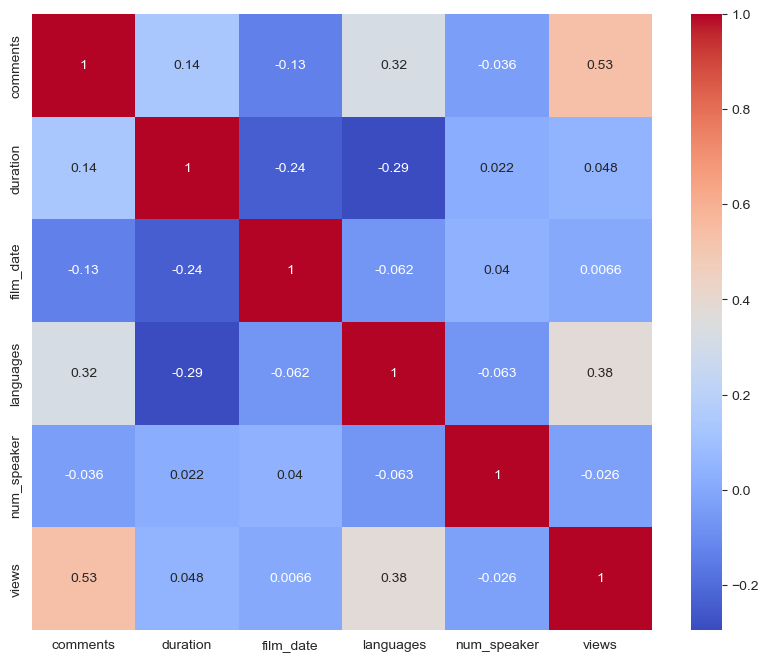

In [12]:
matrix = dataset.drop(columns=['ID']).corr(numeric_only=True)  # We are calculating the correlation matrix across all numerical columns in the dataset.
plt.figure(figsize=(10,8))
sns.heatmap(matrix, cmap="coolwarm",annot=True)
plt.show()

In [13]:
col_corr = set()

for i in range(len(matrix.columns)):
    for j in range(i):
        # We are applying the abs() function to capture both positive and negative correlations.
        if abs(matrix.iloc[i, j]) > 0.5:
            colname = matrix.columns[i]
            col_corr.add(colname)

print("Columns to be considered correlated:", col_corr)

Columns to be considered correlated: {'views'}


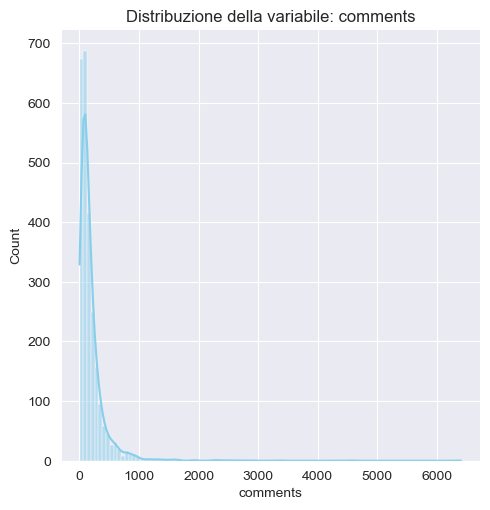

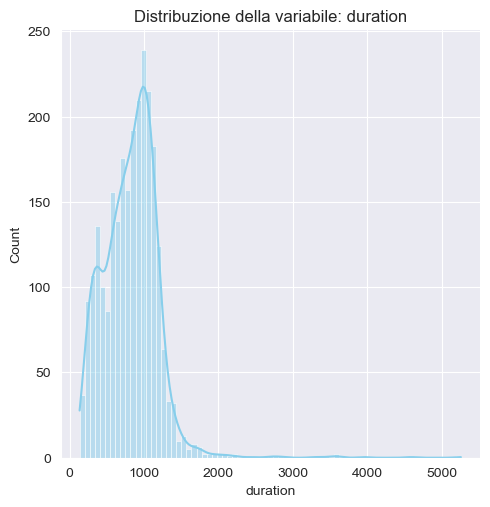

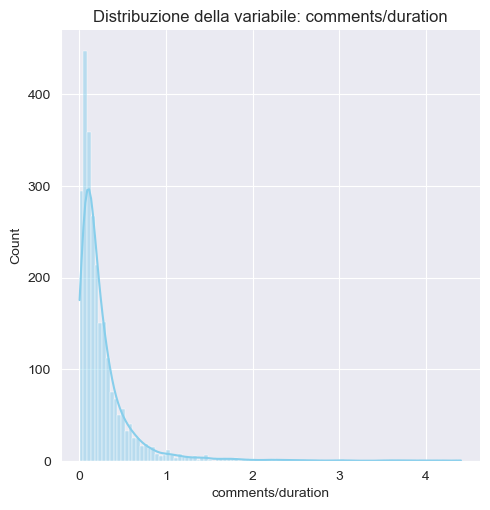

In [14]:
# We are adding a new variable to the dataset that represents the ratio between the number of comments and the duration of each presentation. Next, we will plot the distributions of comments, duration, and their calculated ratio across three separate plots. Finally, we are customizing these charts to enhance their visual clarity and overall readability.

dataset['comments/duration']=dataset['comments']/dataset['duration']

variabili_plot= ('comments','duration','comments/duration')

for i in variabili_plot:
    sns.displot(dataset[i], kde=True, color='skyblue')
    plt.title(f'Distribuzione della variabile: {i}')
    plt.show()

In [15]:
# We are identifying which occupation is the most common among the speakers by determining the most frequent job title in the dataset.

#usiamo value_counts per ottenere contare le frequenze dei valori della variabile e poi index[0] per prendere il primo elemento più frequente visto che per default value_counts ordina gli elementi in ordine decrescente

print('the most frequent job is:',dataset['speaker_occupation'].value_counts().index[0])

the most frequent job is: Writer


In [19]:
# We are calculating the total number of presentations and the total views for each year. Following this, we will determine which year achieved the highest number of views per presentation. Finally, we will plot this ratio over time to visualize how it evolves from year to year.

# Creating a new 'year' column by extracting it from the 'published_date' variable.
dataset['year'] = dataset['published_date'].dt.year

dataset_presentation_year= dataset.groupby('year').agg({
    'views': ['count', 'sum'],
})
dataset_presentation_year.columns = ['Number_presentation', 'Sum_Views']
dataset_presentation_year['Sum_Views/Number_presentation']=(dataset_presentation_year['Sum_Views']/dataset_presentation_year['Number_presentation']).round(2)
dataset_presentation_year['Sum_Views'] = dataset_presentation_year['Sum_Views'].map('{:,}'.format)
dataset_presentation_year.head(10)


,Number_presentation,Sum_Views,Sum_Views/Number_presentation
year,,,
2006,50,"206,548,331",4130966.62
2007,122,"176,455,861",1446359.52
2008,188,"260,270,993",1384420.18
2009,222,"342,059,615",1540809.08
2010,257,"402,694,421",1566904.36
2011,261,"400,499,694",1534481.59
2012,303,"487,028,631",1607355.22
2013,244,"545,291,823",2234802.55
2014,239,"444,231,444",1858708.97


In [20]:
year_with_max_views = dataset_presentation_year['Sum_Views/Number_presentation'].idxmax()
print("The year with the highest number of views per presentation is:",year_with_max_views)

The year with the highest number of views per presentation is: 2006


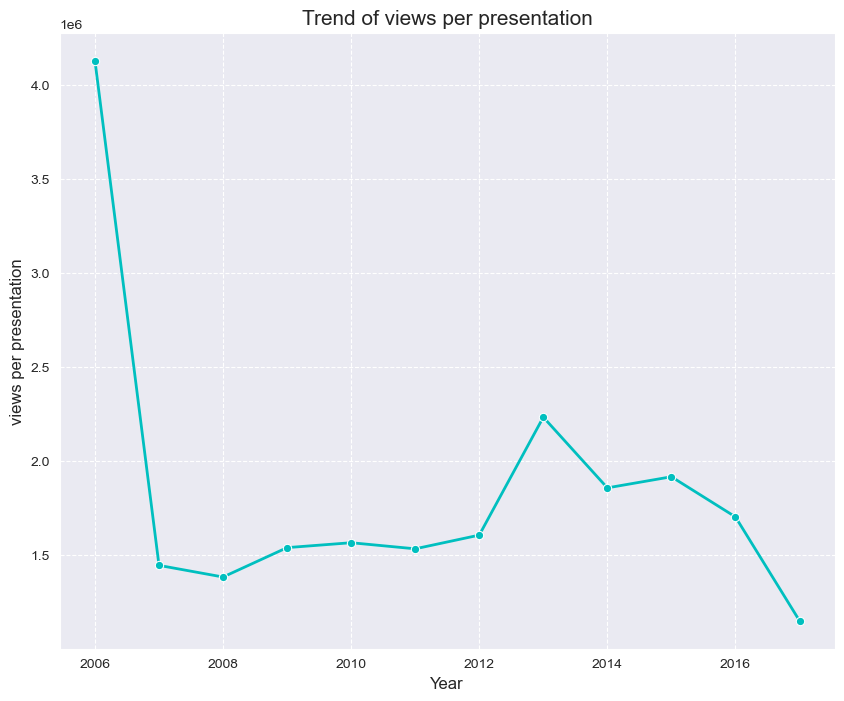

In [22]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=dataset_presentation_year, x='year', y='Sum_Views/Number_presentation', marker='o', color='c', linewidth=2)


plt.title('Trend of views per presentation', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('views per presentation', fontsize=12)
plt.grid(True, linestyle='--')

plt.show()

In [23]:
# We are creating the list of sentiments (unique)
sentiment_list = []
# We are using .itertuples() or accessing the column directly to optimize for execution speed and performance.
for ratings_list in dataset['ratings']:
    ratings_list = ast.literal_eval(ratings_list)  # We are converting the string representation into a list of dictionaries to make the data programmatically accessible.
    for r in ratings_list:
        sentiment_list.append(r['name'])

# We are creating a list to store the new flattened dictionaries.
all_ratings_flat = []

for ratings_list in dataset['ratings']:
    ratings_list = ast.literal_eval(ratings_list)
    # We are creating the dictionary for the current row to store its processed values.
    ratings_present = {r['name']: r['count'] for r in ratings_list}

    # We are filling in the missing sentiments with a value of 0 to ensure a complete and consistent dataset.
    for s in sentiment_list:
        if s not in ratings_present:
            ratings_present[s] = 0

    all_ratings_flat.append(ratings_present)

# We are adding the list as a new column to the DataFrame.
dataset['ratings_flat'] = all_ratings_flat

random_presentation = 'Do schools kill creativity?'
random_presentation_index = np.where(dataset['title'] == random_presentation)[0]
# test
dataset['ratings_flat'].iloc[random_presentation_index]


0    {'Funny': 19645, 'Beautiful': 4573, 'Ingenious': 6073, 'Courageous': 3253, 'Longwinded': 387, 'Confusing': 242, 'Informative': 7346, 'Fascinating': 10581, 'Unconvincing': 300, 'Persuasive': 10704, 'Jaw-dropping': 4439, 'OK': 1174, 'Obnoxious': 209, 'Inspiring': 24924}
Name: ratings_flat, dtype: object

In [24]:
# We are creating a separate new dataframe to organize the sentiment data. First, we will include the unique numerical ID for each presentation to serve as a reference. Then, we will transform each sentiment from the original 'ratings' variable into a distinct column, using the numerical ID to ensure each value is mapped correctly to its presentation. Once the dataframe is complete, we will generate and display the basic descriptive statistics for all these new sentiment-based variables.

# We are creating the dataset including the numerical index to ensure each record is uniquely identified.
dataset_new=dataset['ID']

# We are creating the sentiment dataset using the Series function, which allows us to expand each dictionary key into a separate column.
dataset_reaction = dataset['ratings_flat'].apply(pd.Series)


dataset_new = pd.concat([dataset_new, dataset_reaction], axis=1)

dataset_new


,ID,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2545,1,21,22,24,3,2,33,8,12,24,14,0,1,27
2546,2546,20,4,6,2,0,0,38,32,1,7,8,13,0,20
2547,2547,1,14,19,2,0,5,32,24,1,3,1,4,0,30
2548,2548,63,21,37,107,3,1,75,39,6,65,7,5,7,147


In [25]:
# We are displaying all basic descriptive statistics for this new dataframe to get a comprehensive overview of the data distribution for each sentiment.

dataset_new.describe()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
count,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000
mean,154.784198,192.450472,150.794025,164.701651,32.730346,20.981918,348.054245,314.424135,52.833726,220.185535,147.966981,81.303852,26.027123,530.827044
std,589.795546,477.885206,284.104180,434.188543,41.643115,31.583290,540.249183,625.191783,91.774066,467.149527,554.306195,90.405236,53.501865,1315.976729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,8.000000,26.000000,26.000000,20.000000,9.000000,5.000000,100.000000,79.000000,12.000000,37.000000,18.000000,32.000000,6.000000,113.000000
50%,21.000000,68.000000,69.000000,51.000000,19.000000,12.000000,213.000000,162.000000,27.000000,97.000000,42.000000,55.500000,13.000000,233.500000
75%,92.250000,190.250000,170.250000,149.000000,41.000000,24.000000,401.000000,344.000000,60.000000,226.250000,111.000000,99.000000,27.000000,498.250000
max,19645.000000,9437.000000,6073.000000,8668.000000,447.000000,531.000000,9787.000000,14447.000000,2194.000000,10704.000000,14728.000000,1341.000000,1361.000000,24924.000000


In [26]:
# Finally, we are integrating the new ratings dataframe with the original one by performing a join or merge operation. This allows us to consolidate all presentation details and their corresponding sentiment scores into a single, unified dataset.

dataset= pd.merge(dataset, dataset_new, on='ID',how='left')
dataset.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,4553,Sir Ken Robinson makes an entertaining and profoundly moving case for creating an education system that nurtures (rather than undermines) creativity.,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,387,242,7346,10581,300,10704,4439,1174,209,24924
1,265,"With the same humor and humanity he exuded in ""An Inconvenient Truth,"" Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter brand name for global warming.",977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,...,113,62,443,132,258,268,116,203,131,413
2,124,"New York Times columnist David Pogue takes aim at technology’s worst interface-design offenders, and provides encouraging examples of products that get it right. To funny things up, he bursts into song.",1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,...,78,27,395,166,104,230,54,146,142,230
3,200,"In an emotionally charged talk, MacArthur-winning activist Majora Carter details her fight for environmental justice in the South Bronx -- and shows how minority neighborhoods suffer most from flawed urban policy.",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,...,53,32,380,132,36,460,230,85,35,1070
4,593,"You've never seen data presented like this. With the drama and urgency of a sportscaster, statistics guru Hans Rosling debunks myths about the so-called ""developing world.""",1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,...,110,72,5433,4606,67,2542,3736,248,61,2893


In [27]:
dataset.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'views', 'ID', 'comments/duration', 'anno', 'year',
       'ratings_flat', 'Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring'],
      dtype='object')